In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [2]:
import torch
from torch import nn

import torch_geometric
import torch_geometric.nn as geom_nn
import torch_geometric.data as geom_data

import networkx as nx

from rdkit import Chem as Chem

### About the dataset

Introduced by Debnath et al. in Structure-activity relationship of mutagenic aromatic and heteroaromatic nitro compounds.

> "In particular, MUTAG is a collection of nitroaromatic compounds and the goal is to predict their mutagenicity on Salmonella typhimurium. Input graphs are used to represent chemical compounds, where vertices stand for atoms and are labeled by the atom type (represented by one-hot encoding), while edges between vertices represent bonds between the corresponding atoms. It includes 188 samples of chemical compounds with 7 discrete node labels" (Claudio G. and Alessio M. in Fast and Deep Graph Neural Networks).

In [3]:
# downloading the dataset
tu_dataset = torch_geometric.datasets.TUDataset(root='../data/', name="MUTAG", use_node_attr=True)

### Dataset attributes

| Graphs count | Classes | Avg. Nodes. | Avg. Edges | Node labels | Edge labels | Node attr. | Edge attr. |
| :----------: | :-----: | :---------: | :--------: | :---------: | :---------: | :--------: | :--------: |
| 188          | 2       | 17.93       | 19.79      | +           | +           | -          | -          |

`Data(edge_attr=[7442, 4], edge_index=[2, 7442], x=[3371, 7], y=[188])`

All graphs is put together in the initial data form. For access each of them we just need to pass an index to `tu_dataset` call. Like:

In [4]:
tu_dataset[0]

Data(edge_attr=[38, 4], edge_index=[2, 38], x=[17, 7], y=[1])

### Individual graph attributes

`Data(edge_attr=[38, 4], edge_index=[2, 38], x=[17, 7], y=[1])`

Attributes:
- **edge_attr**: Tells what kind of bond the atom has.
    - `0` - aromatic
    - `1` - single bond
    - `2` - double bond
    - `3` - triple bond
- **edge_index**: List of lists with the start and end of each bond in this molecule.
- **x**: List of each atom indicating they type.
    - `0`: Carbon (C)
    - `1`: Nitrogen (N)
    - `2`: Oxygen (O)
    - `3`: Flourine (F)
    - `4`: Iodine (I)
    - `5`: Chlorine (Cl)
    - `6`: Bromine (Br)
- **y**: Target variable for prediction.

In [5]:
tu_dataset[0].edge_attr[0] # first edge attributes

tensor([1., 0., 0., 0.])

In [6]:
edge_index = tu_dataset[0].edge_index.tolist()
list(zip(edge_index[0], edge_index[1]))[0] # first edge start-end

(0, 1)

In [7]:
# Atoms 0 and 1
tu_dataset[0].x.tolist()[:2]

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

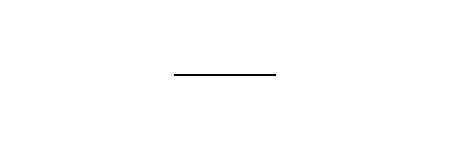

In [8]:
# Generating a mol with this atoms and bonds above
mol = Chem.RWMol()

a = Chem.Atom('C')
# Two Carbon atoms
mol.AddAtom(a)
mol.AddAtom(a)
# One single bond between the two carbons
mol.AddBond(0, 1, Chem.rdchem.BondType.SINGLE)

mol = mol.GetMol()
mol

### Visualizing the graphs in molecular forms

In [9]:
from mutag.src.utils.convert.convert_mol import graph_to_mol

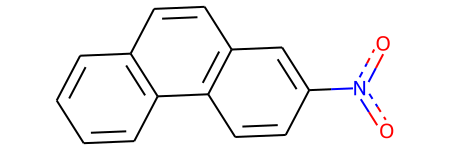

In [10]:
graph_to_mol(tu_dataset[0].x.tolist(), tu_dataset[0].edge_index.tolist(), tu_dataset[0].edge_attr.tolist())

### Plotting more molecules

In [13]:
mols = []

for i in range(6):
    nodes = tu_dataset[i].x.tolist()
    edge_list = tu_dataset[i].edge_index.tolist()
    edge_attr = tu_dataset[i].edge_attr.tolist()
    mols.append(graph_to_mol(nodes, edge_list, edge_attr))

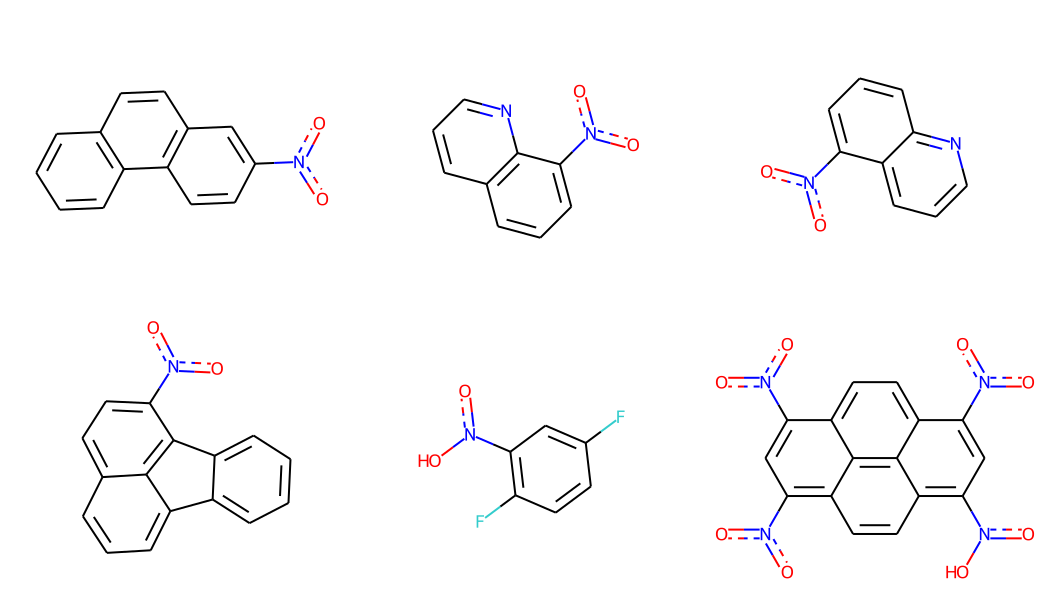

In [14]:
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(350,300))